In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
raw_data = pd.read_csv('../datasets/1.03. Dummies.csv')
raw_data


,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [11]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [12]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


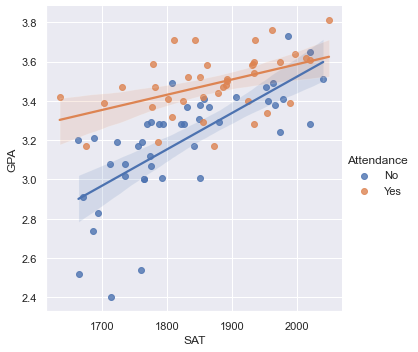

In [39]:
sns.lmplot(data=raw_data, x='SAT', y='GPA', hue='Attendance')
plt.show()

### Regression

In [14]:
y = data['GPA']
x1 = data[['SAT','Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           2.19e-15
Time:                        18:45:02   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.0

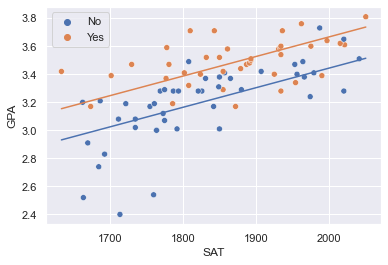

In [38]:
sns.scatterplot(data=raw_data, x='SAT', y='GPA', hue='Attendance')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = (0.6439 + 0.2226) + 0.0014*data['SAT']
sns.lineplot(raw_data, x='SAT', y=yhat_no)
sns.lineplot(raw_data, x='SAT', y=yhat_yes)
plt.show()

### Predictions

In [19]:
new_data = new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [21]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64